In [1]:
import os
import sys

#Get the absolute path to the parent of current working directory 
cwd    = os.getcwd()
source_path = os.path.join(cwd, 'source')
sys.path.append(source_path)
sys.path

import eoMosaic as stacMoz
import eoImage as eoIM

In [2]:
from dask.distributed import LocalCluster
 
cluster = LocalCluster(n_workers = 2, threads_per_worker = 10) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 20,Total memory: 15.72 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57407,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 15.72 GiB
Comm: tcp://127.0.0.1:57421,Total threads: 10
Dashboard: http://127.0.0.1:57422/status,Memory: 7.86 GiB
Nanny: tcp://127.0.0.1:57410,


2024-07-19 22:23:25,841 - distributed.scheduler - WARNING - Worker failed to heartbeat for 3015s; attempting restart: <WorkerState 'tcp://127.0.0.1:57418', name: 1, status: running, memory: 0, processing: 0>
2024-07-19 22:23:25,849 - distributed.scheduler - WARNING - Worker failed to heartbeat for 3016s; attempting restart: <WorkerState 'tcp://127.0.0.1:57421', name: 0, status: running, memory: 0, processing: 0>
2024-07-19 22:23:26,635 - distributed.nanny - WARNING - Restarting worker
2024-07-19 22:23:27,530 - distributed.nanny - WARNING - Restarting worker


In [3]:
ottawa_region = {
    'type': 'Polygon',
    'coordinates': [
       [
         [-76.120,45.184], 
         [-75.383,45.171],
         [-75.390,45.564], 
         [-76.105,45.568], 
         [-76.120,45.184]
       ]
    ]
}


sub_region = {
    'type': 'Polygon',
    'coordinates': [
       [[-78.6303, 44.2113], [-77.04546666666667, 44.2113], [-77.04546666666667, 45.318], [-78.6303, 45.318], [-78.6303, 44.2113]]
    ]
}

params = {
    'sensor': 'S2_SR',           # A sensor type string (e.g., 'S2_SR' or 'L8_SR' or 'MOD_SR')
    'unit': 2,                   # A data unit code (1 or 2 for TOA or surface reflectance)    
    'year': 2022,                # An integer representing image acquisition year
    'nbYears': -1,               # positive int for annual product, or negative int for monthly product
    'months': [8],               # A list of integers represening one or multiple monthes     
    'tile_names': ['tile42_921'], # A list of (sub-)tile names (defined using CCRS' tile griding system) 
    'prod_names': ['mosaic'],    #['mosaic', 'LAI', 'fCOVER', ]    
    'resolution': 200,            # Exporting spatial resolution    
    'out_folder': 'C:/Work_documents/test_xr_tile42_921_2022_200m',  # the folder name for exporting
    'projection': 'EPSG:3979'   
    
    #'start_date': '2022-06-15',
    #'end_date': '2022-09-15'
}

In [4]:
#base_img = stacMoz.get_base_Image(ssr_data, sub_region, 'EPSG:3979', 100, start_str, end_str)
#base_img = eoIM.attach_AngleBands(base_img, ssr_data)

mosaic = stacMoz.new_period_mosaic(params, 'C:\\Work_documents\\scene_geo_angles\\tile42_geo_angles_2022_Summer.csv')
#sub_mosaic = stacMoz.get_sub_mosaic(ssr_data, sub_region, 'EPSG:3979', 200, start_str, end_str)

#base_img = eoIM.apply_gain_offset(base_img, ssr_data, 100, False)
#base_img.odc.geobox
#display(mosaic)

stacMoz.export_mosaic(params, mosaic)

<search_STAC_Images> The given region =  {'type': 'Polygon', 'coordinates': [[[-122.1409, 53.9559], [-120.3386, 51.4542], [-116.2217, 52.4298], [-117.7869, 55.0058], [-122.1409, 53.9559]]]}
<get_base_Image> A total of 245 items were found.
<<<<<<< The assets associated with an item >>>>>>>

Asset key: aot, title: Aerosol optical thickness (AOT), href: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/U/ED/2022/8/S2A_10UED_20220831_0_L2A/AOT.tif
Asset key: blue, title: Blue (band 2) - 10m, href: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/U/ED/2022/8/S2A_10UED_20220831_0_L2A/B02.tif
Asset key: coastal, title: Coastal aerosol (band 1) - 60m, href: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/U/ED/2022/8/S2A_10UED_20220831_0_L2A/B01.tif
Asset key: granule_metadata, title: None, href: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/U/ED/2022/8/S2A_10UED_20220831_0_L2A/granule_metadata.x

C:\Users\lsun\Anaconda3\envs\stac\Lib\site-packages\xarray\core\duck_array_ops.py:239: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


'\nmasked_IC.isel(time=5).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\nmasked_IC.isel(time=15).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\nmasked_IC.isel(time=24).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\n'

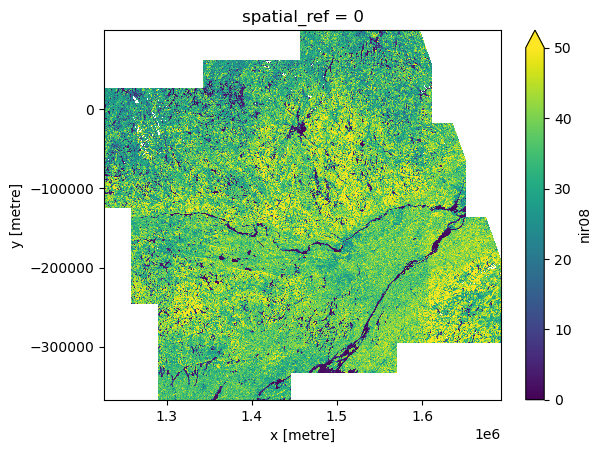

In [4]:
'''
scl = stac_IC.scl
condition = (stac_IC > 0) & (scl != 3) & (scl != 8) & (scl != 9)  # & (scl != 10)
masked_IC = stac_IC.where(condition)

median_image = masked_IC.median(dim='time')
'''

mosaic.nir08.plot.imshow(vmin=0, vmax=50)

'''
masked_IC.isel(time=5).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
masked_IC.isel(time=15).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
masked_IC.isel(time=24).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
'''

In [6]:
scored_img_coll = stacM.attach_score(stac_IC)
display(scored_img_coll)

<xarray.Dataset> Size: 53GB
Dimensions:      (y: 27909, x: 25226, time: 5)
Coordinates:
  * y            (y) float64 223kB 1.41e+05 1.41e+05 ... -4.171e+05 -4.171e+05
  * x            (x) float64 202kB 1.209e+06 1.209e+06 ... 1.714e+06 1.714e+06
    spatial_ref  int32 4B 3979
  * time         (time) datetime64[ns] 40B 2022-07-02T16:11:17.032000 ... 202...
Data variables:
    blue         (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    green        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    red          (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    nir08        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    swir16       (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    swir22       (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    scl          (time, y, x) uint8 4GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    score        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

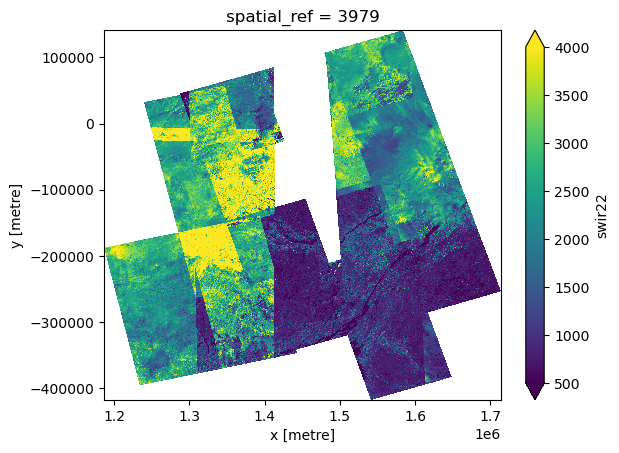

In [6]:
median_image.swir22.plot.imshow(vmin=500, vmax=4000)

In [9]:
stac_IC.sizes['time']

7

In [3]:
import xarray as xr
import numpy as np

# Step 1: Import the required modules (done)

# Step 2: Create a simple xarray dataset
data1 = np.random.rand(4, 3)
data2 = np.random.randint(0, 100, size=(4, 3))

ds = xr.Dataset(
    {
        "temperature": (("x", "y"), data1),
        "precipitation": (("x", "y"), data2)
    },
    coords={
        "x": [0, 1, 2, 3],
        "y": [0, 1, 2]
    }
)

print("Original Data Types:")
print(ds) 

# Step 3: Change the data type of the 'temperature' and 'precipitation' variables
ds = ds.astype(np.float32)


print("\n\nNew Data Types:")
print(ds)  # Output: float32


Original Data Types:
<xarray.Dataset> Size: 172B
Dimensions:        (x: 4, y: 3)
Coordinates:
  * x              (x) int32 16B 0 1 2 3
  * y              (y) int32 12B 0 1 2
Data variables:
    temperature    (x, y) float64 96B 0.5453 0.5308 0.7008 ... 0.4494 0.9391
    precipitation  (x, y) int32 48B 70 82 10 29 18 89 30 11 7 77 11 57


New Data Types:
<xarray.Dataset> Size: 124B
Dimensions:        (x: 4, y: 3)
Coordinates:
  * x              (x) int32 16B 0 1 2 3
  * y              (y) int32 12B 0 1 2
Data variables:
    temperature    (x, y) float32 48B 0.5453 0.5308 0.7008 ... 0.4494 0.9391
    precipitation  (x, y) float32 48B 70.0 82.0 10.0 29.0 ... 7.0 77.0 11.0 57.0


In [5]:
import certifi
certifi.where()

'C:\\Users\\lsun\\Anaconda3\\envs\\stac\\Lib\\site-packages\\certifi\\cacert.pem'

In [7]:
import xarray as xr
from pystac_client import Client
import odc.stac

# Define the STAC API endpoint
STAC_API_URL = "https://planetarycomputer.microsoft.com/api/stac/v1"

# Initialize the STAC client
stac_client = Client.open(STAC_API_URL)

# Define a function to load STAC items into an xarray object with error handling
def load_stac_data(collection, bbox, datetime, limit, bands):
    # Search parameters
    # Perform the search
    search = stac_client.search(collections = [collection],
        bbox = bbox,       
        datetime = datetime,
        limit = limit)
    
    # Get the items
    items = list(search.items())
    
    # Load the items into an xarray object
    try:
        ds = odc.stac.load(items, bands=bands, groupby='solar_day', crs = 'EPSG:3979',                        
                        fail_on_error = False,
                        resolution = 10)
        return ds
    except Exception as e:
        print(f"Failed to load data: {e}")
        return None

# Define search parameters for Landsat Surface Reflectance data
collection_landsat = "landsat-8-c2-l2"
bbox = [-125.0, 35.0, -122.0, 37.0]  # Example bounding box
datetime = "2022-06-01/2022-06-05"
limit = 1
bands = ['red', 'green', 'blue']  # Example bands

# Load Landsat data into an xarray object
landsat_ds = load_stac_data(collection_landsat, bbox, datetime, limit, bands)
if landsat_ds is not None:
    print(landsat_ds)
else:
    print("No data loaded")

# Example analysis or usage of the xarray object

Failed to load data: Union of empty stream is undefined
No data loaded


In [6]:
import odc.stac
import pystac_client
import requests
import matplotlib.pyplot as plt

# Define the STAC API endpoint
#stac_api_url = "https://earth-search.aws.element84.com/v0"
stac_api_url = "https://earth-search.aws.element84.com/v1"

# Create a STAC client
client = pystac_client.Client.open(stac_api_url)

# Define search parameters (e.g., collection, time range, and bounding box)
search = client.search(
    collections="landsat-8-l1",       #"sentinel-2-l2a", 
    datetime="2020-08-14/2020-08-15",
    bbox=[-110.0, 40.0, -109.0, 41.0]  # Example bounding box
)

# Get the first item from the search results
items = search.items()
#item = items[0]

# Check the available assets
#print(item.assets)

# Specify the bands you want to load (e.g., band 4 and band 5)
bands = ["red", "blue"]

# Load the data using odc.stac.load
crs = "EPSG:32613"  # Example CRS, replace with the correct CRS for your data
resolution = (-30.0, 30.0)  # Example resolution in meters, adjust as needed

# Load the data using odc.stac.load
ds = odc.stac.load(items, bands=bands, crs=crs, resolution=resolution)

# Inspect the dataset
print(ds)

# Access the data array for the band
band4_data = ds.sel(band="red")
band5_data = ds.sel(band="blue")

# Plot the data (optional, requires matplotlib)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(band4_data, cmap='gray')
plt.title('red')

plt.subplot(1, 2, 2)
plt.imshow(band5_data, cmap='gray')
plt.title('blue')

plt.show()

ValueError: Union of empty stream is undefined

In [5]:
import certifi
certifi.where()

'C:\\Users\\lsun\\Anaconda3\\envs\\stac\\Lib\\site-packages\\certifi\\cacert.pem'

In [3]:
import odc.stac
import xarray as xr
import numpy as np
from pystac_client import Client
from shapely.geometry import box
from datetime import datetime

import dask
from concurrent.futures import ThreadPoolExecutor


# Define the spatial region (bounding box)
bbox = box(minx=12.492, miny=41.890, maxx=14.503, maxy=43.899)  # Example: Rome, Italy

# Define the time window
start_date = "2023-07-01"
end_date = "2023-07-31"

# Define cloud coverage filter
max_cloud_coverage = 20  # maximum cloud coverage in percent

# Connect to the STAC catalog
catalog = Client.open("https://earth-search.aws.element84.com/v1")

# Search for Sentinel-2 surface reflectance data
search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=bbox.bounds,
    datetime=f"{start_date}/{end_date}",
    query={"eo:cloud_cover": {"lt": max_cloud_coverage}}
)

# Get the items from the search results
items = list(search.items())
print('the number of items = ', len(items))
print('items properties = ', items[0].properties)





# Load the data using odc.stac.load
ds = odc.stac.load(
    items,
    bands=["red", "green", "blue", "scl"],  # Load some bands as an example
    bbox=bbox.bounds,
    crs='EPSG:3979',
    chunks={'x': 1000, 'y': 1000},  # Use Dask for chunking along the time dimension
    resolution = 10
)


'''
# Load data as xarray.Dataset
ds = odc.stac.load(
    items,
    bands=["B04", "B03", "B02", "SCL"],
    groupby="solar_day",
    resolution=(-10, 10),
    crs="EPSG:4326"
)
'''

print('xrDS = ', ds)

# Extract the sun elevation angle and compute the sun zenith angle
#sun_elevation_angle = ds.attrs.get("view:sun_elevation", None)
#if sun_elevation_angle is None:
#    raise ValueError("Sun elevation angle metadata is not available in the dataset attributes.")

# Compute sun zenith angle for the entire dataset
sun_zenith = 55.5
ds = ds.assign(sun_zenith=([], sun_zenith))

print('xrDS after adding SZA = ', ds)
# Define a Dask configuration for threading
with dask.config.set(pool=ThreadPoolExecutor(64), scheduler="threads"):
    # Access the data to trigger the computation
    raw_data = ds.compute()

# Now ds contains the sun zenith angle for each item in the dataset
print(ds)






# Extract the view:sun_elevation values from the metadata
sun_elevations = []
for item in items:
    if "view:sun_elevation" in item.properties:
        sun_elevations.append(item.properties["view:sun_elevation"])

# Print the extracted sun elevation values
print(sun_elevations)

# Merge the sun elevation data array into the dataset
#ds = ds.assign(sun_elevation=sun_elevation_da)

# Print the final dataset
#print(ds)



the number of items =  70
items properties =  {'created': '2023-07-29T18:32:16.899Z', 'platform': 'sentinel-2a', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 0.236217, 'proj:epsg': 32632, 'mgrs:utm_zone': 32, 'mgrs:latitude_band': 'T', 'mgrs:grid_square': 'QM', 'grid:code': 'MGRS-32TQM', 'view:sun_azimuth': 142.447252649291, 'view:sun_elevation': 62.5912315500185, 's2:degraded_msi_data_percentage': 0.0003, 's2:nodata_pixel_percentage': 3.365616, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0.009964, 's2:cloud_shadow_percentage': 0.14447, 's2:vegetation_percentage': 28.829089, 's2:not_vegetated_percentage': 21.764129, 's2:water_percentage': 48.96532, 's2:unclassified_percentage': 0.050303, 's2:medium_proba_clouds_percentage': 0.183079, 's2:high_proba_clouds_percentage': 0.052754, 's2:thin_cirrus_percentage': 0.000385, 's2:snow_ice_percentage': 0.000508, 's2:product_type': 'S2MSI2A', 's2:processing_baseline': '05.09', 's2:produc

C:\Users\lsun\Anaconda3\envs\stac\Lib\site-packages\rasterio\warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(
C:\Users\lsun\Anaconda3\envs\stac\Lib\site-packages\rasterio\warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(
Aborting load due to failure while reading: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/T/QN/2023/7/S2B_32TQN_20230727_0_L2A/B04.tif:1
Aborting load due to failure while reading: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/T/QN/2023/7/S2B_32TQN_20230727_0_L2A/B04.tif:1
Aborting load due to failure while reading: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/T/QN/2023/7/S2B_32TQN_20230727_0_L2A/B04.tif:1
Aborting load due to failure while reading: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/T

WarpOperationError: Chunk and warp failed

In [17]:
from joblib import Parallel, delayed

def test():
  shared_set = set()
  def collect(x):
    shared_set.add(x)

  Parallel(n_jobs=2, require='sharedmem')(delayed(collect)(i) for i in range(25))

test()

sorted(shared_set)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [16]:
sorted(shared_set)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]